# Projeto 1 - Simulação

    Processos Estocásticos: SME-0805 2020.2
	 _______ _______ _______
	|   |   |               \
	|   |   |      \    |___|
	|   |    \      |   |
	|_______ _______|___|

- Luíza, Nº USP XXXXX
- Marina, Nº USP XXXXX
- Matheus Carvalho Raimundo, Nº USP 10369014
- Vitor, Nº USP XXXXX


### Bibliotecas e Constantes

Primeiro, vamos importar todas as bibliotecas que usaremos ao longo das simulações. Também vamos definir algumas constantes que serão usadas no código.

In [1]:
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np
import random
import math

# Definição do número de simulações. Quanto mais simulações, mais lento o código, porém mais próximo do valor real.
N_SIM_START = 1 # Começa em quantas simulações?
N_SIM_END = 3000 # Termina em quantas simulaçoes?
N_SIM_STEP = 100 # Pula de quanto em quanto?

# Matplotlib
FIG_SIZE = (10, 6) # Tamanho para plotar usando a matplotlib.
X_SIM = np.arange(N_SIM_START, N_SIM_END + N_SIM_STEP, N_SIM_STEP, dtype = np.int) # Usado no código (eixo X dos gráficos).
Y_SIM = np.empty([X_SIM.shape[0]], dtype = np.float) # Usado no código (eixo Y a ser preenchido dos gráficos).

# Essa função exibe um gráfico (mostrando os valores simulados e o valor teórico, se tiver).
def exibir(x_points = X_SIM, y_points = Y_SIM, valor_teorico = None, x_lim = None, y_lim = None, sim_label = 'Valor simulado', theo_label = 'Valor teórico', x_label = 'Número de experimentos', y_label = 'Resultado obtido', figsize = FIG_SIZE):
    plt.figure(figsize = figsize)
    ax = plt.axes()
    plt.plot(x_points, y_points, linestyle='-', color = 'blue', linewidth=2, label = sim_label)
    if valor_teorico is not None:
        plt.axhline(y = valor_teorico, color = 'r', linestyle = '--', label = theo_label)
        plt.text(1.01, valor_teorico, '%g' % (valor_teorico), color = 'r', transform = ax.get_yaxis_transform(), bbox = dict(facecolor='w', alpha=0.5), ha = 'left', va = 'center')
    plt.ylabel(y_label, fontsize = 20)
    plt.xlabel(x_label, fontsize = 20)
    if x_lim is None:
        x_lim = [np.amin(x_points), np.amax(x_points)]
    if y_lim is None and valor_teorico is None:
        y_lim = [np.amin(y_points), np.amax(y_points)]
    elif y_lim is None:
        y_lim = [min(np.amin(y_points), valor_teorico), max(np.amax(y_points), valor_teorico)]
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.legend()
    plt.show(True)

### Exercício 1 - A

Esta simulação se refere ao primeiro exercício, letra A.

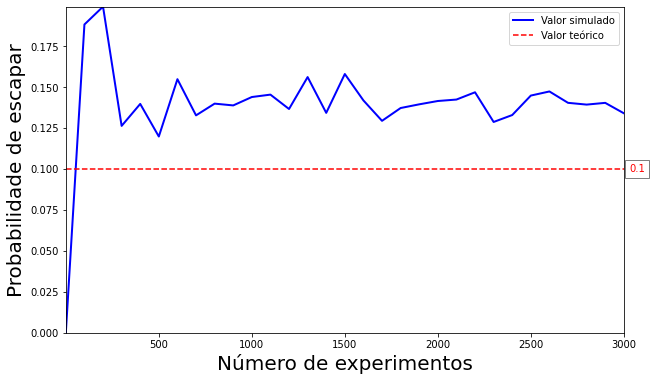

In [2]:
# Definir possíveis movimentos da mosca.
movements = {
    'mesa': ['aranha', 'maca'],
    'maca': ['mesa', 'cadeira'],
    'cadeira': ['aranha', 'maca', 'janela'],
    'aranha': False, # Foi pega pela aranha!
    'janela': True # Fugiu pela janela!
}
start_point = 'mesa'
calculado = 0.1 # Valor calculado na parte escrita do projeto.

for i in range(X_SIM.shape[0]): # Para cada ponto do eixo X...
    n = X_SIM[i]
    count = 0
    for _ in range(n): # Realizar os N experimentos.
        current = start_point
        while type(movements[current]) == list:
            current = random.choice(movements[current])
        if movements[current] == True:
            count += 1
    Y_SIM[i] = count / n
    
exibir(valor_teorico = calculado, y_label = 'Probabilidade de escapar')

### Exercício 1 - B

Esta simulação se refere ao primeiro exercício, letra B.

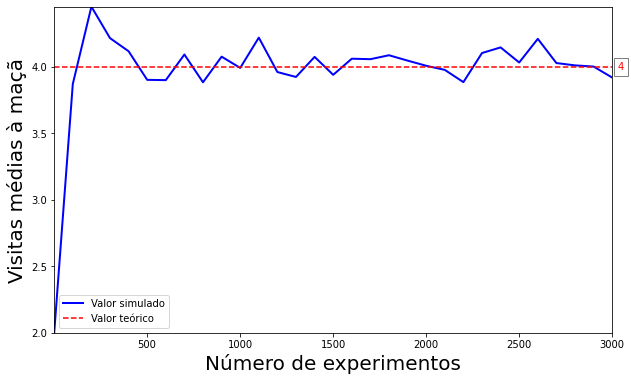

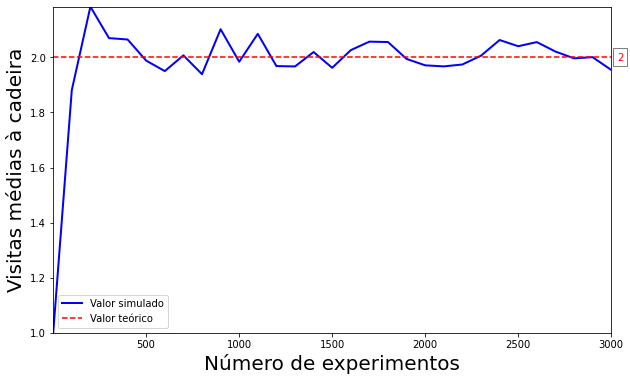

In [7]:
# Valor calculado na parte escrita do projeto.
calculado_maca = 4
calculado_cadeira = 2

# Alocar.
y_maca = Y_SIM
y_cadeira = np.copy(Y_SIM)

for i in range(X_SIM.shape[0]): # Para cada ponto do eixo X...
    n = X_SIM[i]
    visitas_maca = 0
    visitas_cadeira = 0
    for _ in range(n): # Realizar os N experimentos.
        current = start_point
        while type(movements[current]) == list:
            if current == 'maca':
                visitas_maca += 1
            if current == 'cadeira':
                visitas_cadeira += 1
            current = random.choice(movements[current])
    y_maca[i] = visitas_maca / n
    y_cadeira[i] = visitas_cadeira / n
    
exibir(valor_teorico = calculado_maca, y_points = y_maca, y_label = 'Visitas médias à maçã')
exibir(valor_teorico = calculado_cadeira, y_points = y_cadeira, y_label = 'Visitas médias à cadeira')

### Exercício 1 - C

Esta simulação se refere ao primeiro exercício, letra C.

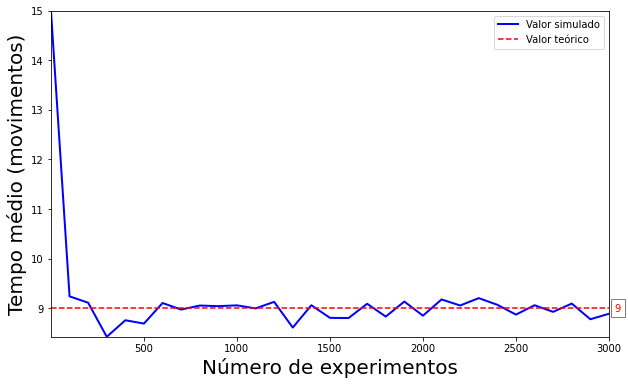

In [4]:
# Redefinir possíveis movimentos da mosca (agora removemos a aranha).
movements = {
    'mesa': ['maca'],
    'maca': ['mesa', 'cadeira'],
    'cadeira': ['maca', 'janela'],
    'janela': True # Fugiu pela janela!
}
start_point = 'mesa'
calculado = 9 # Valor calculado na parte escrita do projeto.

for i in range(X_SIM.shape[0]): # Para cada ponto do eixo X...
    n = X_SIM[i]
    movement_count = 0
    for _ in range(n): # Realizar os N experimentos.
        current = start_point
        while type(movements[current]) == list:
            movement_count += 1
            current = random.choice(movements[current])
    Y_SIM[i] = movement_count / n
    
exibir(valor_teorico = calculado, y_label = 'Tempo médio (movimentos)')

### Exercício 2

Esta simulação se refere ao segundo exercício.